In [42]:
#Data Preparation
import pandas as pd

In [43]:
combats = pd.read_csv('combats.csv')
pokemon = pd.read_csv('pokemon.csv')
test = pd.read_csv('tests.csv')
prediction = test.copy()
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [44]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [45]:
pokemon['Type 1'] = pokemon['Type 1'].replace('Fighting', 'Fight')
pokemon['Type 2'] = pokemon['Type 2'].replace('Fighting', 'Fight')

In [46]:
pokemon['Legendary'] = pokemon['Legendary'].map({False: 0, True:1})

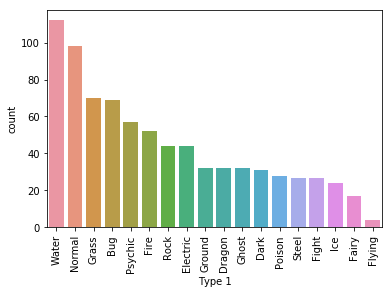

In [47]:
sns.countplot(x='Type 1', data=pokemon, order=pokemon['Type 1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

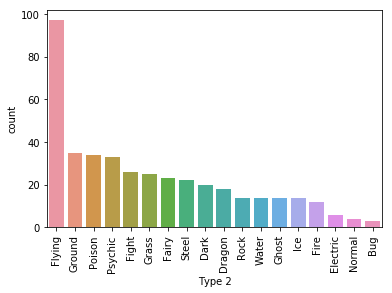

In [48]:
sns.countplot(x='Type 2', data=pokemon, order=pokemon['Type 2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [49]:
combats['target'] = combats['Winner'].apply(lambda x: 1 if x == 'yes' else 0)

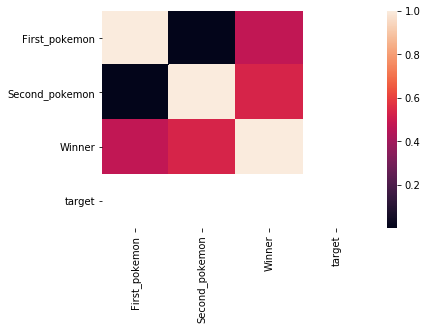

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = combats.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [51]:
pokemon['Total_stats'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']
print(pokemon.iloc[:, [1, -1]].head())

            Name  Total_stats
0      Bulbasaur          318
1        Ivysaur          405
2       Venusaur          525
3  Mega Venusaur          625
4     Charmander          309


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


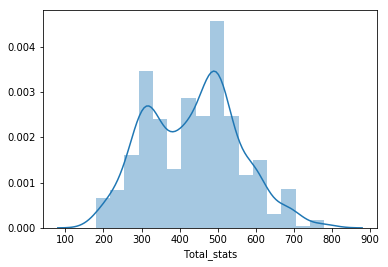

In [52]:
sns.distplot(pokemon.Total_stats)
plt.show()

In [53]:
mean_stats = pokemon['Total_stats'].mean()
print(mean_stats)

435.1025


In [54]:
average_pokemon = min(pokemon['Total_stats'], key=lambda x: abs(x-mean_stats))
print(pokemon.loc[((pokemon['Total_stats'] >= average_pokemon-5) & (pokemon['Total_stats'] <= average_pokemon+5)), ['Name', 'Total_stats']])

           Name  Total_stats
29        Arbok          438
45   Wigglytuff          435
58      Persian          440
122     Tangela          435
126      Seadra          440
210    Quagsire          430
215  Misdreavus          435
222      Gligar          430
227    Qwilfish          430
233     Sneasel          430
300     Swellow          430
302    Pelipper          430
312    Vigoroth          440
331      Lairon          430
369    Lunatone          440
370     Solrock          440
384     Kecleon          440
531       Rotom          440
661       Klang          440
772     Dedenne          431


In [55]:
sorted_pokemon = pokemon.sort_values(by='Total_stats')
print(sorted_pokemon[['Name', 'Total_stats']].head(15))

           Name  Total_stats
206     Sunkern          180
322     Azurill          190
446   Kricketot          194
288     Wurmple          195
16       Weedle          195
13     Caterpie          195
303       Ralts          198
732  Scatterbug          200
139    Magikarp          200
381      Feebas          200
291     Cascoon          205
186       Pichu          205
17       Kakuna          205
14      Metapod          205
289     Silcoon          205


In [56]:
print(sorted_pokemon[['Name', 'Total_stats', 'Legendary']].tail(10))

                    Name  Total_stats  Legendary
413       Mega Metagross          700          0
409       Mega Salamence          700          0
494        Mega Garchomp          700          0
712  Kyurem White Kyurem          700          1
552               Arceus          720          1
424       Primal Groudon          770          1
422        Primal Kyogre          770          1
164        Mega Mewtwo Y          780          1
426        Mega Rayquaza          780          1
163        Mega Mewtwo X          780          1


In [57]:
legendary_pokemon = pokemon.loc[pokemon['Legendary'] == True]
legendary_pokemon = legendary_pokemon.sort_values(by='Total_stats')
print(legendary_pokemon[['Name', 'Total_stats']].head(20))

                          Name  Total_stats
156                   Articuno          580
539                      Azelf          580
699                   Cobalion          580
700                  Terrakion          580
701                   Virizion          580
702   Tornadus Incarnate Forme          580
703     Tornadus Therian Forme          580
704  Thundurus Incarnate Forme          580
538                    Mesprit          580
416                  Registeel          580
415                     Regice          580
705    Thundurus Therian Forme          580
158                    Moltres          580
157                     Zapdos          580
414                   Regirock          580
262                     Raikou          580
537                       Uxie          580
264                    Suicune          580
263                      Entei          580
794         Zygarde Half Forme          600


1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


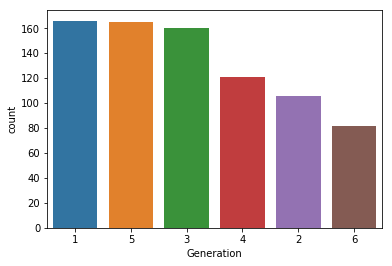

In [58]:
print(pokemon['Generation'].value_counts())
sns.countplot(x='Generation', data=pokemon, order=pokemon['Generation'].value_counts().index)
plt.show()

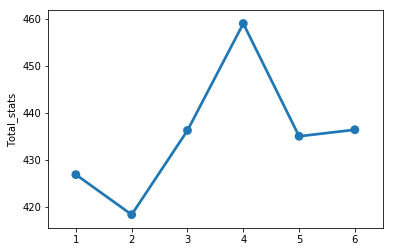

In [59]:
group = pokemon.drop(['#', 'Legendary'], axis=1)
pokemon_groups = group.groupby('Generation')
pokemon_groups_mean = pokemon_groups.mean()

sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Total_stats'])
plt.show()

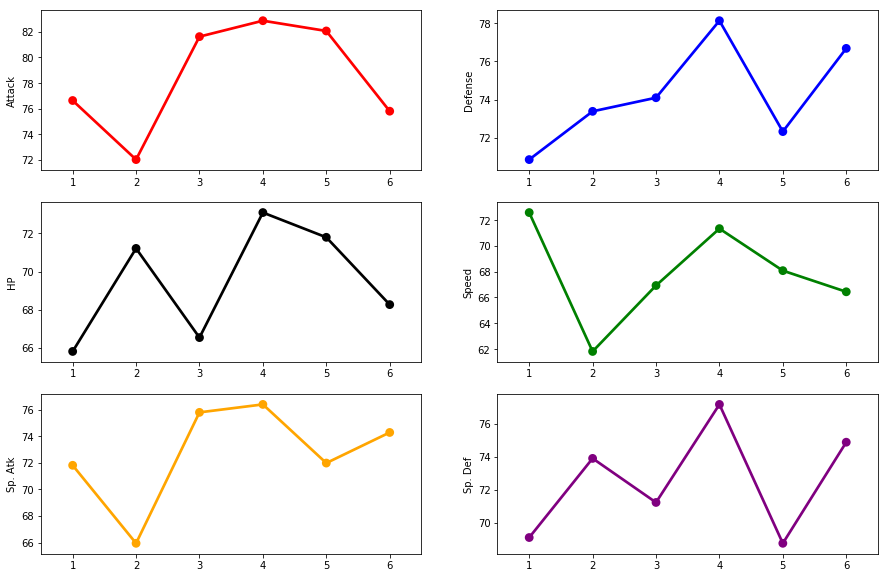

In [60]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Attack'], color='red', ax=axes[0][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Defense'], color='blue', ax=axes[0][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['HP'], color='black', ax=axes[1][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Speed'], color='green', ax=axes[1][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Sp. Atk'], color='orange', ax=axes[2][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Sp. Def'], color='purple', ax=axes[2][1])

plt.show()

In [61]:
name_dict = dict(zip(pokemon['#'], pokemon['Name']))
combats_name = combats[['First_pokemon', 'Second_pokemon', 'Winner']].replace(name_dict)
print(combats_name.head())

  First_pokemon Second_pokemon     Winner
0      Larvitar        Nuzleaf    Nuzleaf
1      Virizion      Terrakion  Terrakion
2       Togetic       Beheeyem   Beheeyem
3        Slugma      Druddigon  Druddigon
4       Omastar        Shuckle    Omastar


In [62]:
first_battle = combats_name['First_pokemon'].value_counts()
second_battle = combats_name['Second_pokemon'].value_counts()
win_counts = combats_name['Winner'].value_counts()
total_battle = first_battle + second_battle
win_percentage = win_counts / total_battle

win_percentage = win_percentage.sort_values()
print(win_percentage)

Silcoon                     0.021739
Togepi                      0.024590
Solosis                     0.031008
Slugma                      0.032520
Munna                       0.039062
Igglybuff                   0.043478
Wynaut                      0.046154
Wooper                      0.048000
Cascoon                     0.052632
Spritzee                    0.060150
Spheal                      0.061069
Cleffa                      0.062500
Oddish                      0.062937
Musharna                    0.068182
Sentret                     0.072000
Wurmple                     0.072464
Magcargo                    0.072581
Duosion                     0.072581
Spewpa                      0.075188
Happiny                     0.076923
Lotad                       0.079365
Scatterbug                  0.082090
Seedot                      0.087302
Kricketot                   0.088710
Shelmet                     0.088710
Nosepass                    0.092857
Bergmite                    0.093023
P

In [63]:
win_percentage.dropna(inplace=True)
print(win_percentage)

Silcoon                     0.021739
Togepi                      0.024590
Solosis                     0.031008
Slugma                      0.032520
Munna                       0.039062
Igglybuff                   0.043478
Wynaut                      0.046154
Wooper                      0.048000
Cascoon                     0.052632
Spritzee                    0.060150
Spheal                      0.061069
Cleffa                      0.062500
Oddish                      0.062937
Musharna                    0.068182
Sentret                     0.072000
Wurmple                     0.072464
Magcargo                    0.072581
Duosion                     0.072581
Spewpa                      0.075188
Happiny                     0.076923
Lotad                       0.079365
Scatterbug                  0.082090
Seedot                      0.087302
Kricketot                   0.088710
Shelmet                     0.088710
Nosepass                    0.092857
Bergmite                    0.093023
P